# Produção de Oleo (tons) - Oil Production Tonnes

Projeto final da disciplina **Forecasting**

#### **Aluna:** Fernanda de Queiroz Souza

*Fonte: https://github.com/Eraylson/series_temporais*

## Bibliotecas

In [147]:
!pip install pmdarima

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [146]:
import pmdarima as pm
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import os

import datetime
from datetime import datetime, date, time, timedelta

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

In [2]:
import  warnings 
warnings.simplefilter('ignore')

In [3]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Leitura dos dados

In [4]:
original_path = os.getcwd()
original_path

'C:\\Users\\Fernanda.Souza\\OneDrive - Unilever\\Documents\\Jupyter\\MBA\\MBA_Forecasting'

In [5]:
os.chdir('C:/Users/Fernanda.Souza/OneDrive - Unilever/Documents/Jupyter/MBA/MBA_Forecasting/ProjetoFinal')

In [116]:
df = pd.read_excel('oil-production-tonnes.xls')

## Análise dos dados

In [117]:
df

,Year,Million Tones
0,1965-01-01,5.033297
1,1966-01-01,6.147396
2,1967-01-01,7.738966
3,1968-01-01,8.504936
4,1969-01-01,9.277483
5,1970-01-01,8.800012
6,1971-01-01,9.202844
7,1972-01-01,9.015267
8,1973-01-01,9.149792
9,1974-01-01,9.521158


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           49 non-null     datetime64[ns]
 1   Million Tones  49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 912.0 bytes


In [119]:
# Renomeando as colunas para serem mais intuitivas
df = df.rename(columns = {'Year': 'ano', 
                          'Million Tones': 'milhoes_tons', 
                         })

In [120]:
df['ano'] = df['ano'].astype(str)

In [121]:
df['ano'] = df['ano'].str[0:4]
df

,ano,milhoes_tons
0,1965,5.033297
1,1966,6.147396
2,1967,7.738966
3,1968,8.504936
4,1969,9.277483
5,1970,8.800012
6,1971,9.202844
7,1972,9.015267
8,1973,9.149792
9,1974,9.521158


In [122]:
df['ano'] = df['ano'].astype(int)

In [123]:
#Transformando a coluna "ano" em index para facilitar as avaliações posteriores da série 
df = df.set_index('ano')
df.head()

,milhoes_tons
ano,
1965,5.033297
1966,6.147396
1967,7.738966
1968,8.504936
1969,9.277483


In [124]:
# Conferindo se realmente não tem nenhum dado faltante na série
print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


A série possue uma coluna correspondente ao ano de produção, que foi transformada em index para facilitar as avaliações da série que serão feitas nas sessões seguintes, e uma coluna correspondente a produção em milhões de toneladas de oléo. Possui 49 linhas, ou seja, 49 entradas de dados com nenhum dado faltante. 

## Análise da série

**Avaliação dos números**

In [125]:
df.describe()

,milhoes_tons
count,49.000000
mean,42.369504
std,35.975151
min,5.033297
25%,9.277483
50%,32.152651
75%,70.033871
max,114.212252


**Plotagem da série**

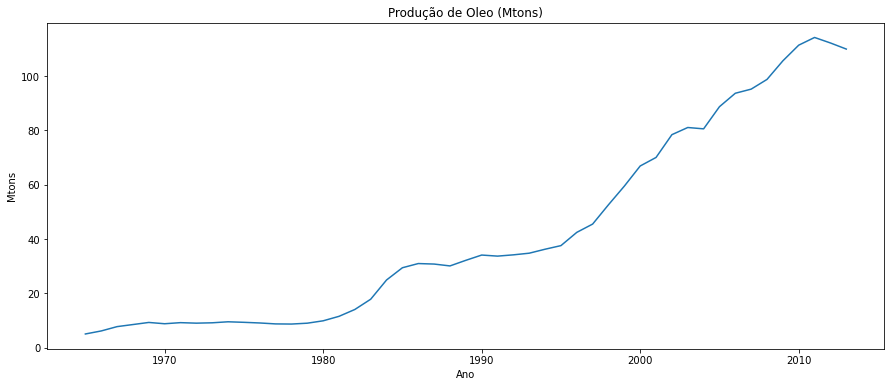

In [126]:
plt.title('Produção de Oleo (Mtons)')
plt.xlabel("Ano")
plt.ylabel("Mtons")
plt.plot(df['milhoes_tons'])

**Decomposição da tendencia, sazonalidade e resíduo da série**

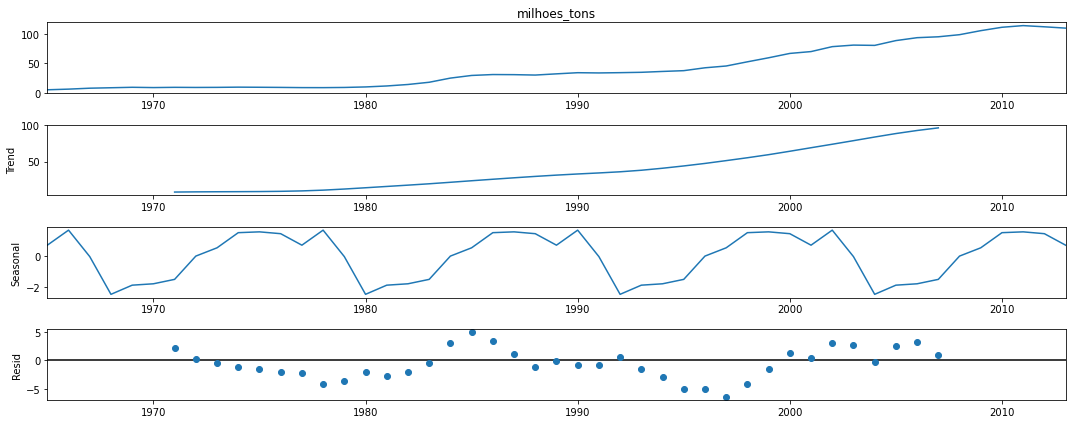

In [127]:
df_decomp = tsa.seasonal_decompose(df['milhoes_tons'], period=12)
df_decomp.plot();

**Média e desvio padrão da série**

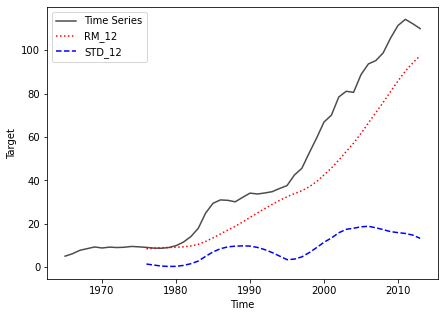

In [128]:
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df, color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

**Função de Autocorrelação (FAC) e Função de Autocorrelação Parcial (FACP)**

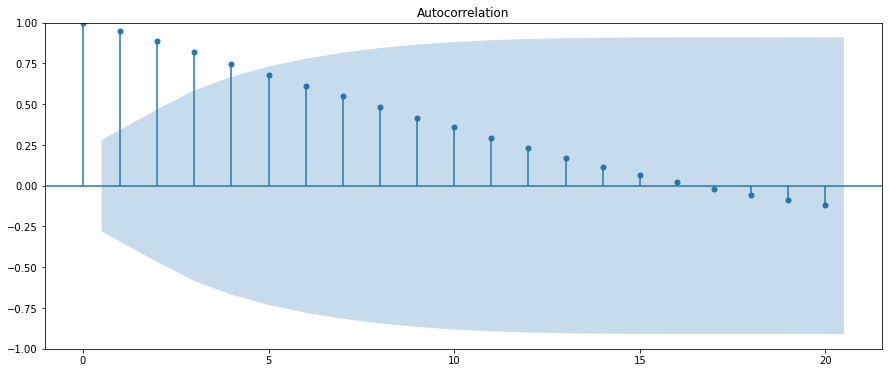

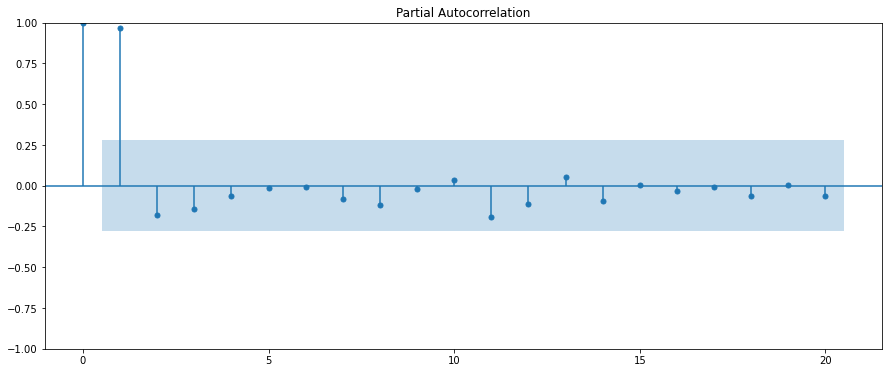

In [129]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

**Teste de estacionariedade**

In [130]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (5%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        print('estacionária')
    else:
        print(df_output[0])
        print('não estacionária')

In [131]:
teste_df(df.values)

Test Statistic          0.424912
p-value                 0.982403
#Lags                   1.000000
Nº Observações         47.000000
Valor Crítico (1%)     -3.577848
Valor Crítico (5%)     -2.925338
Valor Crítico (10%)    -2.600774
dtype: float64
0.42491206216122157
não estacionária


## Pré - processamento

Solicitação: Divida a série nos conjuntos de treinamento, validação e teste com as seguintes porcentagens:
50%, 25% e 25%, seguindo a ordem temporal. Desenvolva, avalie e compare os modelos no
cenário da previsão de um passo à frente.

In [132]:
print('Quantidade de linhas a serem consideradas')
print('Total:',df.shape[0])
print('Train:',(df.shape[0])*0.75)
#print('Validation:',(df.shape[0])*0.75)
print('Test:',(df.shape[0])*0.25)

Quantidade de linhas a serem consideradas
Total: 49
Train: 36.75
Test: 12.25


In [133]:
#limite1 = round(len(df) * 0.5)
limite2 = round(len(df) * 0.75)

train = df[:limite2]
#validation = df[limite1:limite2]
test = df[limite2:]

In [134]:
#if len(df) == len(train) + len(validation) + len(test):
if len(df) == len(train) + len(test):
    print("True")
    print('Train:',train.shape[0])
   #print('Validation:',validation.shape[0])
    print('Test:',test.shape[0])
else:
    print("Rever separação")

True
Train: 37
Test: 12


## Metodologia Box-Jenkins

In [135]:
# Função para plotar o ACF E PACF
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

### (1) Identificação:

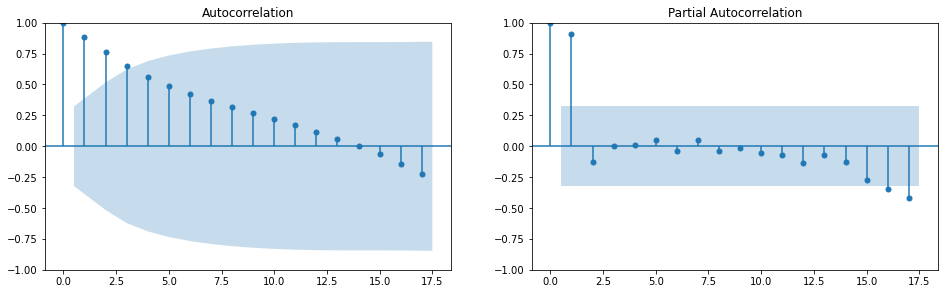

In [136]:
acf_pacf(train.milhoes_tons, 17)

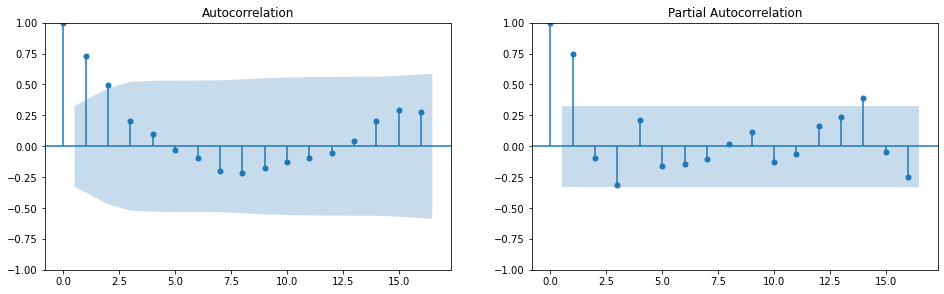

In [137]:
acf_pacf(train.milhoes_tons.diff().dropna(), 16)

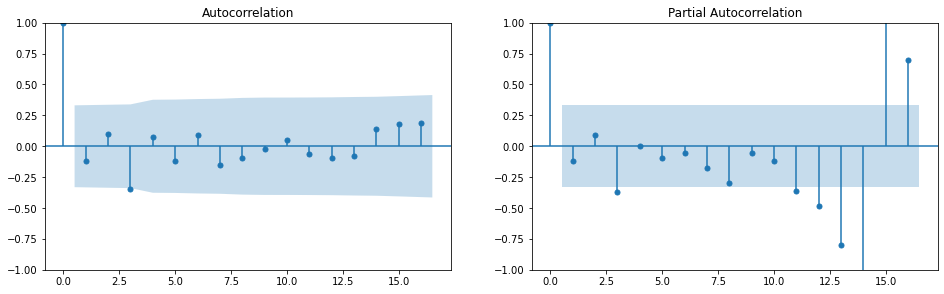

In [138]:
acf_pacf(train.milhoes_tons.diff().diff().dropna(), 16)

#### Escolha do parâmetro (d):

Avaliando a quantidade de diferenciações

In [139]:
arima_d = 0

#### Escolha do parâmetro (p):

Avaliando FACP (Partial Autocorrelation)

In [140]:
arima_p = 1

#### Escolha do parâmetro (q):

Avaliando FAC (Autocorrelation)

In [141]:
arima_q = 0

In [145]:
model_auto_arima = auto_arima(dados, max_p = 5 , max_q = 5, max_d = 2, 
                         max_P = 2, max_Q = 2, max_D = 2, m = 12, 
                         seasonal = False, trace = True, information_criterion = 'bic', 
                         stepwise = True)

NameError: name 'auto_arima' is not defined

### (2.1) Estimação:

In [142]:
model = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -94.774
Date:                Tue, 27 Sep 2022   AIC                            195.547
Time:                        12:18:42   BIC                            200.380
Sample:                             0   HQIC                           197.251
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5424     30.495      1.198      0.231     -23.226      96.311
ar.L1          0.9955      0.030     32.797      0.000       0.936       1.055
sigma2         8.6485      1.708      5.063      0.0

### (2.2) Avaliação/Diagnóstico:

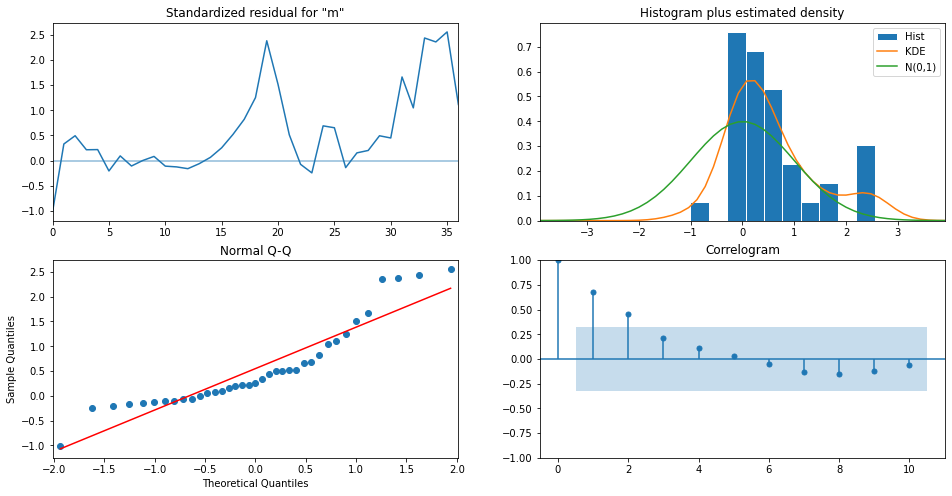

In [143]:
model_fit.plot_diagnostics(figsize=(16,8));

### (3) Previsão:

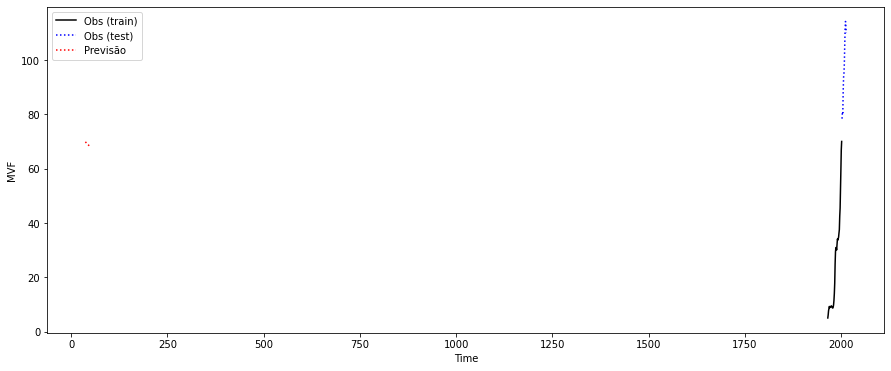

In [144]:
previsao = model_fit.predict(start=37, end=49)

obs_train = plt.plot(train, color='black', label='Obs (train)')
obs_test = plt.plot(test, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(previsao, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
# previsao

,pred,obs
105,1306.030255,1152
106,1374.079064,806
107,1385.550053,1225
108,1387.483718,504
109,1387.809676,1493
110,1387.864622,1011
111,1387.873885,1737
112,1387.875446,1258
113,1387.875709,2102
114,1387.875754,2428


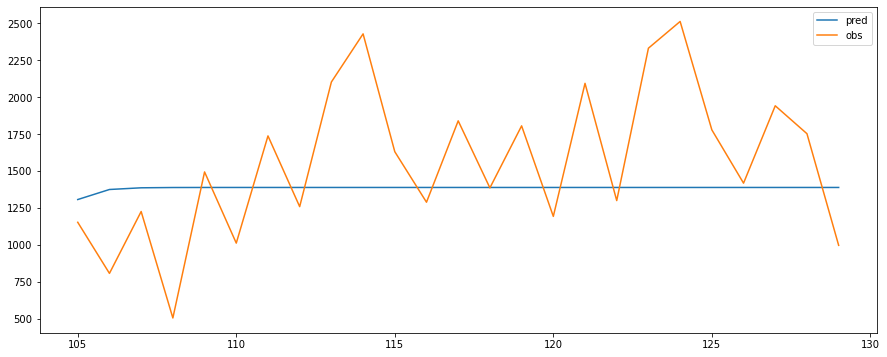

In [159]:
pred = model_fit.predict(start=len(train), end=len(test+train)-1)
obs = test.Milimitros

pred_df = pd.DataFrame()
pred_df['pred'] = pred
pred_df['obs'] = obs

pred_df.plot()
pred_df

## LIXO

In [58]:
#adf = adfuller(df)
#print(f'p-valor: {round(adf[1],2)}')

In [81]:
#df.info()

In [80]:
#Definindo as variáveis preditoras (X) e a target (y). Ainda não está pegando o bairro.
#X = df.iloc[:,1]
#y = df.iloc[:,2]

In [82]:
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train.shape
#y_train.shape

In [20]:
#df['Ano'].value_counts()

In [14]:
#df['Year'] = df['Year'].astype(str)

In [14]:
#df['Year'] = df['Year'].str[0:4]
#df

In [16]:
#df['Year'] = df['Year'].astype(int)

In [15]:
#df.info()

In [177]:
#df.set_index('Year',inplace=True)
#df.index=df.index.astype(int)

### Eliminação da Tendência por Diferenciação

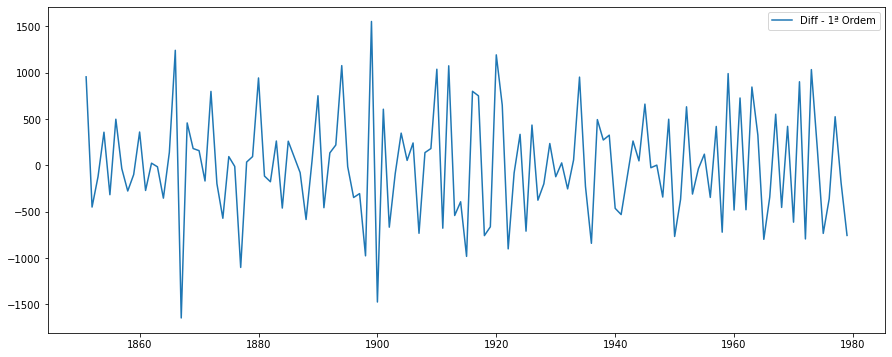

In [60]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

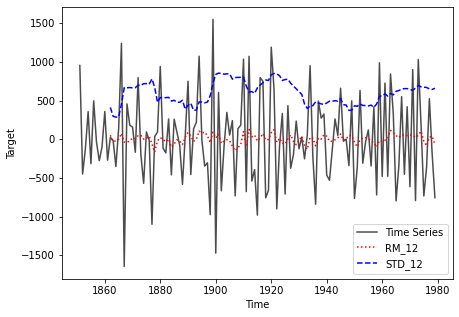

In [61]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df['Milimitros'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

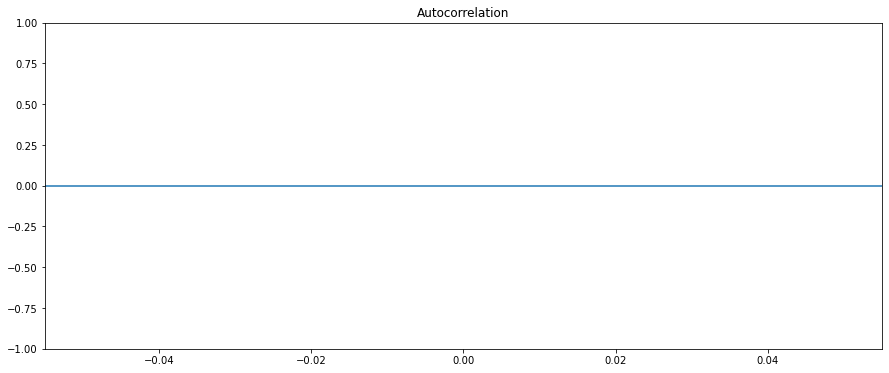

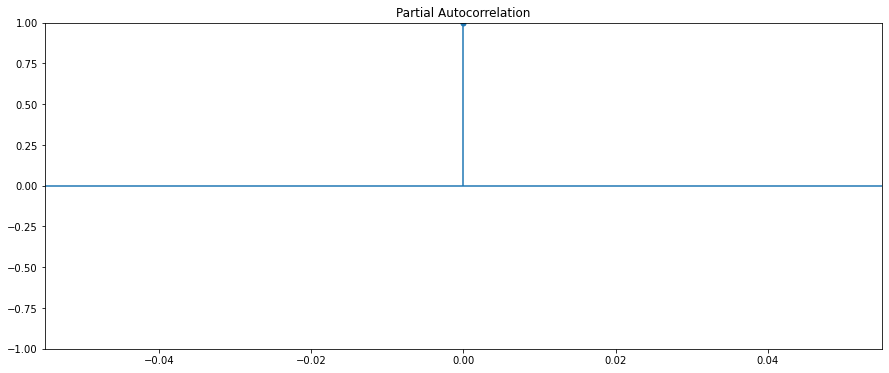

In [63]:
plot_acf(df_1ordem, lags=50)
plot_pacf(df_1ordem, lags=50)
plt.show()

In [64]:
df_decomp_1ordem = tsa.seasonal_decompose(df_1ordem, period=12)
df_decomp_1ordem.plot();

ValueError: This function does not handle missing values

In [60]:
#df_logged = df["ncasos"].apply(lambda x : np.log(x))

#ax1 = plt.subplot()
#df_logged.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);

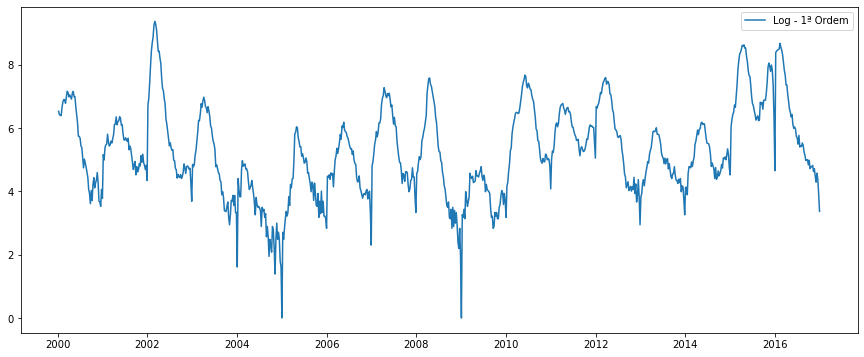

In [59]:
df_logg = np.log(df)
plt.plot(df_logg, label = "Log - 1ª Ordem")
plt.legend(loc = 'best')
plt.show()

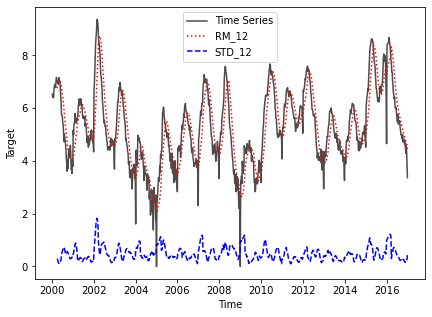

In [61]:
rolmean12 = np.log(df).rolling(window = 12).mean()
rolstd12 = np.log(df).rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

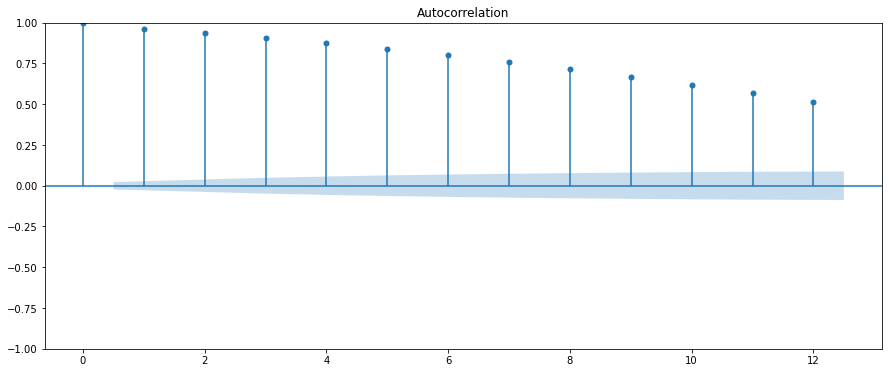

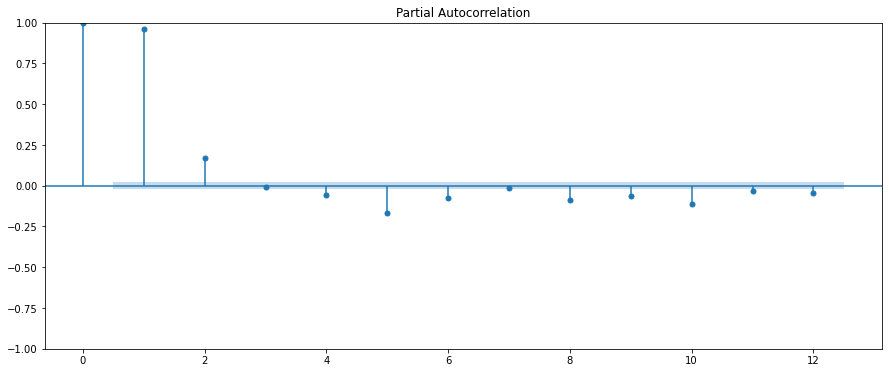

In [62]:
plot_acf(df_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_logg.dropna(), lags=12, alpha=0.5);

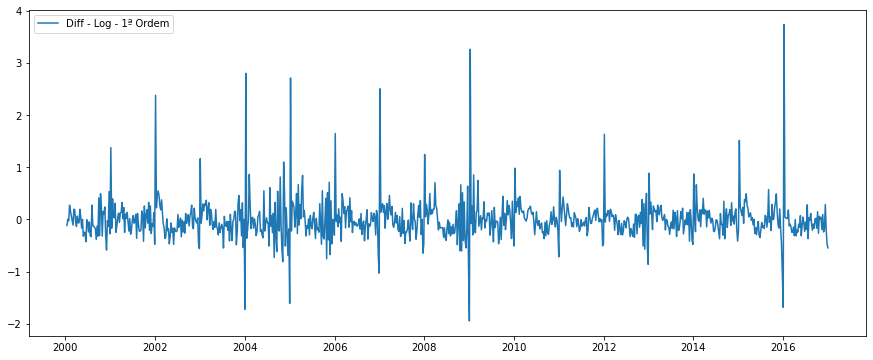

In [66]:
df_diff_logg = df_logg.diff()
plt.plot(df_diff_logg, label="Diff - Log - 1ª Ordem")
plt.legend(loc='best')
plt.show()

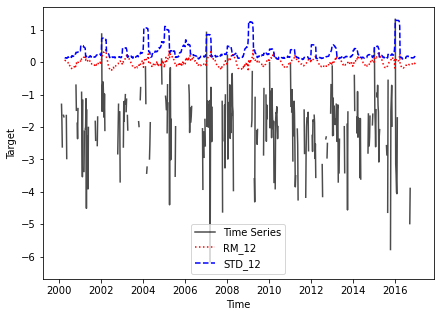

In [68]:
rolmean12 = df_diff_logg.rolling(window = 12).mean()
rolstd12 = df_diff_logg.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df_diff_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [67]:
#df_logg2 = np.log(df_logg)
#plt.plot(df_logg, label = "Log - 2ª Ordem")
#plt.legend(loc = 'best')
#plt.show()

In [69]:
#rolmean12 = np.log(df_logg).rolling(window = 12).mean()
#rolstd12 = np.log(df_logg).rolling(window = 12).std()
#plt.figure(figsize=(7, 5))
#actual = plt.plot(np.log(df_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
#rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
#std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
#plt.legend(loc='best')
#plt.xlabel("Time")
#plt.ylabel("Target")
#plt.show()

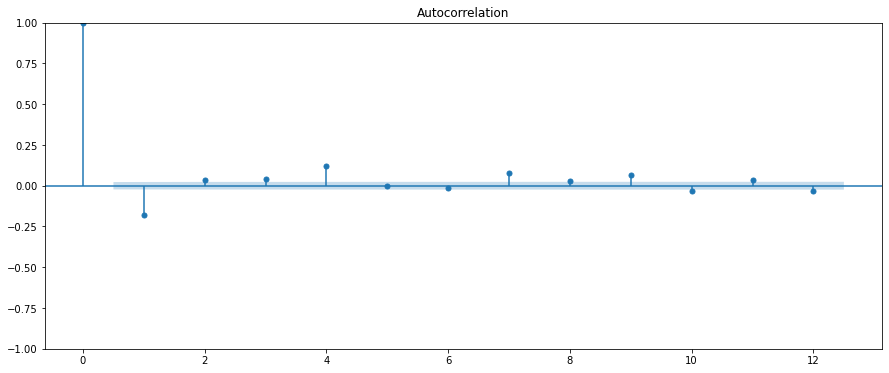

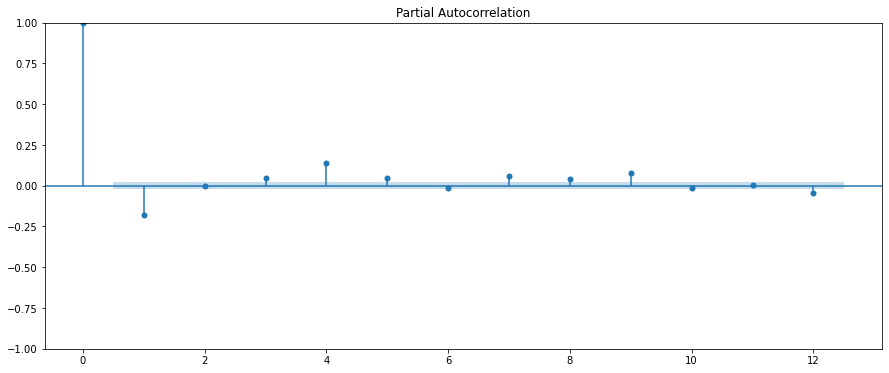

In [70]:
plot_acf(df_diff_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_diff_logg.dropna(), lags=12, alpha=0.5);